<a href="https://colab.research.google.com/github/schwallergroup/ai4chem_course/blob/main/notebooks/01d_rdkit_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Basic handling of molecular data using Python

## RDKit
`RDKit` is an open-source software toolkit for cheminformatics, designed to assist in the analysis and design of small molecules and chemical compounds. It provides a set of libraries and tools for the manipulation and analysis of molecular structures, molecular descriptors, molecular fingerprints, molecular similarity, molecular visualization, and more. The toolkit is widely used in academia, as well as in the pharmaceutical, biotech, and chemical industries for a variety of tasks such as virtual screening, lead optimization, and chemical database management.

## Install dependencies

First, you'll need to install the `RDKit` library. You can do this by running `pip install rdkit`:

In [ ]:
!pip install rdkit

Now that we have `rdkit` we can start importing relevant modules and downloading our example ESOL dataset. 

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole


Let's start looking at a specific molecule to play around with RDKit functionalities, and look at caffeine. 

The name `caffeine` does not contain any structural information on the molecule. Just by having this name a computer does not know how many (heavy) atoms `caffeine` contains and what bonds they form. We need machine-accessible representations. One of the most commonly used ones is `SMILES`.

## SMILES

`SMILES` (Simplified Molecular Input Line Entry System) is a line notation representation of molecular structures. It is a way of representing chemical compounds as strings of characters, which can be easily processed and analyzed by computer algorithms.

Each SMILES string consists of symbols that represent the elements in the molecule, as well as brackets and other characters that describe the bonding between the atoms. For example, the SMILES string for ethanol (C2H5OH) would be `CCO`. In SMILES, each carbon atom is represented by the letter "C", each hydrogen atom by the letter "H", and each oxygen atom by the letter "O". The bonding between the atoms is indicated by the arrangement of the characters in the string.

SMILES is widely used in cheminformatics and computational chemistry, as it provides a compact and standardized way of representing molecular structures in a machine-readable form. This makes it possible to compare and analyze large numbers of chemical compounds, as well as to generate predictions about their properties and behavior.


 Look up the SMILES string of `caffeine` on Wikipedia/PubChem. 

In [ ]:
caffeine = '' # fill in the SMILES 

## TODO: add a lot of cool stuff that can be done with a molecule

Let's start with the most basic rdkit action: creating a Mol object. Mol objects represent molecules, and can be created using different representations (SMILES, mol files, )... We will use the basic MolFromSmiles function to create a variable 'mol' representing our caffeine molecule.

In [5]:
mol = Chem.MolFromSmiles(caffeine)

#Note: if you try to pass directly a the caffeine SMILES string, you will get the same result

We can display the value of a variable in the notebook by typing the name and then running the cell. In this case, we can visualize the molecule this way.

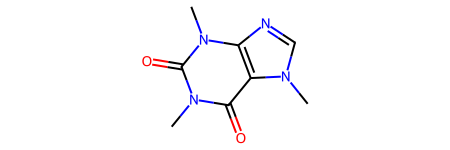

In [4]:
mol

Visualize molecule (display/Draw) + grid image?

Iterate through atoms

Canonicalization

Fingerprints

Murcko Scaffold

## Combining RDKit with Pandas

The next step is to convert the data in the `df` dataframe into molecular objects that can be processed by RDKit. You can do this using the `PandasTools.AddMoleculeColumnToFrame` function.

To do that we will not use the `Compound ID` column (as it only contains names, and not the actual structure), but we will use the `smiles` column. 

In [ ]:
# get the dataset 
df = pd.read_csv("https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/data/delaney-processed.csv" )
df.head()

In [ ]:
# Convert SMILES into Mol objects
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles')
df.head()

As you can see a new `ROMol` column appeared.

Apply functions to df

Descriptors

Substructure match